# LDA topic Modelling and K-means clustering to cluster similar set of documents

In [3]:
%store -r finalDocumentSet

In [4]:
print(len(finalDocumentSet))

88


In [5]:
import numpy as np

In [6]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
!python -m spacy download en

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
F:\python\lib\site-packages\en_core_web_sm -->
F:\python\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('en_core_web_sm')


You should consider upgrading via the 'python -m pip install --upgrade pip' command.
You do not have sufficient privilege to perform this operation.


In [9]:
nlp = spacy.load('en_core_web_sm')

In [10]:
%store -r cleanDocx

In [11]:
print(len(cleanDocx))

88


In [117]:
%store -r dfObj1

In [118]:
dfObj1

,0
0,"[""['health planners policy-makers face comple..."
1,"[""['knowledge organization () (also termed inf..."
2,"[""['searching broad topic areas raises particu..."
3,"[""[' systematic reviews seek answer spec..."
4,"[""[': systematic reviews provide less biased ..."
...,...
83,"[""[' introduced many ways which -demics p..."
84,"[""[': meta-research studies investigating meth..."
85,"[""[' systematic reviews.london: sage; 2012.go..."
86,"[""['*correspondence : . wettermark, centre ph..."


In [119]:
data = dfObj1.values.tolist()

In [120]:
print(len(data))

88


In [121]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


In [122]:
data_words = list(sent_to_words(data))
print(data_words[:1])

[['health', 'planners', 'policy', 'makers', 'face', 'complex', 'decisions', 'requiringa', 'deep', 'knowledge', 'healthcare', 'systems', 'which', 'consist', 'ganizations', 'people', 'actions', 'involved', 'maintaining', 'restoring', 'andenhancing', 'human', 'well', 'being', 'characteristics', 'healthcare', 'systemsare', 'considered', 'important', 'indicator', 'population', 'health', 'quality', 'life', 'people', 'developing', 'integrated', 'smart', 'systems', 'forcities', 'regions', 'ismagilova', 'hughes', 'dwivedi', 'raman', 'thereis', 'signiﬁcant', 'variation', 'policy', 'funding', 'delivery', 'health', 'careacross', 'regions', 'griﬃn', 'understanding', 'these', 'diﬀerencesand', 'they', 'impact', 'health', 'communities', 'requires', 'health', 'planners', 'this', 'evidence', 'drive', 'improvement', 'regional', 'healthcare', 'delivery', 'growing', 'availability', 'healthcare', 'data', 'raises', 'prospect', 'ofbetter', 'evidence', 'informed', 'decision', 'making', 'healthcare', 'systems',

In [123]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [124]:
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'VERB']) #select noun and verb
print(data_lemmatized[:2])


['health planner policy maker face decision requiringa system consist ganization people action involve maintain restore andenhance human consider indicator population quality life people develop integrate system forcitie region signiﬁcant policy funding delivery health region griﬃn understand diﬀerencesand impact health community require health planner evidence drive improvement healthcare delivery grow availability raise ofbetter evidence decision make healthcare system interaction structure process outcome andagent characterize uncertainty meadow care epitomize thiscomplexity illness health planner todrive quality improvement datum must reﬂect complexity health care capitalize evolution beenhampere limit ability information caban analytic play role lyze healthcare datum refer tool analysis technique visualization user capitalize datum improve stand decision make information system knowledge discovery database intelligence correspond author mail address receive receive revise form acc

In [125]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,
# minimum reqd occurences of a word 
                             stop_words='english',             
# remove stop words
                             lowercase=True,                   
# convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  )
# num chars > 3
                             # max_features=50000,             
# max number of uniq words    )
data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [126]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=10,               # Number of topics
                                      max_iter=10,               
# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          
# Random state
                                      batch_size=128,            
# n docs in each learning iter
                                      evaluate_every = -1,       
# compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               
# Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [127]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -833949.3049892912
Perplexity:  401.9443269274857
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [128]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)


GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='online',
                                                 learning_offset=50.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=5,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1, random_state=0,
                                                 topic_word_prior=None,
                                                 total_samples=1000000.0,
                               

In [129]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))


Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -188269.7833942194
Model Perplexity:  449.22423774685444


In [130]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names

print(len(data))
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(88).style.applymap(color_green).applymap(make_bold)
df_document_topics

88


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.04,0,0,0,0,0,0.96,0,0,0,6
Doc1,0,0,0.71,0,0,0,0,0.21,0.08,0,2
Doc2,0,0,0,0,0,0,1,0,0,0,6
Doc3,0,0,0,0,0,0,0.91,0.09,0,0,6
Doc4,0.86,0,0,0.14,0,0,0,0,0,0,0
Doc5,0,0,0,0,0,0,0,1,0,0,7
Doc6,0,0,0,0,0,0,0,1,0,0,7
Doc7,0,0,0.03,0,0,0,0,0.97,0,0,7
Doc8,0.31,0,0,0,0,0,0.69,0,0,0,6
Doc9,0,0.67,0,0,0,0,0,0.33,0,0,1


In [131]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head(10)

,ability,absence,abstract,accept,access,accord,account,accuracy,achieve,acknowledge,...,website,week,weight,word,work,workload,world,write,year,yield
Topic0,4.627765,0.878683,32.754084,7.650850,16.538818,8.650435,4.782725,24.691129,7.707596,2.411765,...,1.609032,2.869698,6.026896,3.809078,30.607661,4.721051,3.717086,7.646265,22.483517,7.633736
Topic1,0.905398,0.749732,0.811100,1.318476,1.229777,1.267659,1.028395,1.397463,0.973316,0.705729,...,0.788342,0.717539,0.760991,1.676636,3.543228,1.235018,0.915901,0.980226,1.941811,0.881437
Topic2,9.284789,3.626553,7.521055,7.189196,15.120550,6.764143,4.240000,19.135953,4.509499,1.326055,...,2.422229,0.981398,7.280173,18.063997,33.519670,5.878819,7.037585,3.707546,8.400398,3.048522
Topic3,2.411154,1.273918,5.731035,2.577854,26.369516,2.779312,0.775683,1.680208,2.035945,0.912252,...,14.238776,1.543070,0.958260,2.425495,5.611058,0.942463,3.087320,2.202976,5.544629,0.870745
Topic4,1.281819,1.032479,3.205356,3.243993,3.261256,1.812537,1.673344,2.026706,3.553997,0.974363,...,1.552868,1.134605,2.399962,1.643154,6.696504,8.374539,1.083286,1.772193,3.021797,2.439713
Topic5,0.814135,0.736832,0.895201,1.100877,1.722142,0.795092,0.749244,1.039337,0.918380,0.759807,...,0.834259,0.862727,0.786239,0.805686,1.602318,0.930182,0.881477,0.817605,0.922442,0.964144
Topic6,3.762777,1.944601,11.351047,6.300520,14.403817,5.572104,2.633267,3.082489,9.008372,1.794817,...,4.137778,0.801760,4.484968,29.794385,20.234000,4.531777,7.753298,3.241106,11.661331,6.264930
Topic7,6.175035,2.142650,21.571440,15.514254,9.455206,19.436885,7.887646,17.003533,12.358967,3.447925,...,1.864173,2.754271,16.946313,19.507486,66.195389,21.373646,8.710846,12.449149,12.829457,7.915196
Topic8,1.318300,1.894145,6.901869,2.692493,3.443371,2.314829,3.463586,1.838111,1.181711,1.064681,...,4.283485,1.034498,1.022183,2.242824,7.628093,0.946339,1.134022,0.919678,1.382438,10.886379
Topic9,0.917817,0.726960,1.337158,1.314746,1.881528,1.323310,1.159902,2.118132,1.702709,0.876086,...,0.846828,0.846851,1.400638,2.072257,3.466430,1.577410,1.202971,1.034042,1.796965,1.254996


In [132]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,study,review,base,pattern,use,research,design,quality,method,effect,evidence,result,author,report,health
Topic 1,study,address,datum,match,use,research,distance,method,base,process,result,string,pattern,measurement,paper
Topic 2,study,application,base,use,review,result,user,condition,knowledge,article,research,information,provide,method,type
Topic 3,trial,search,register,publication,report,information,study,article,datum,result,provide,record,identify,review,publish
Topic 4,review,study,cost,screening,text,mining,use,approach,process,include,search,base,title,datum,method
Topic 5,review,trial,search,citation,study,datum,result,information,register,identify,publish,publication,include,research,provide
Topic 6,study,review,search,use,term,evidence,reference,include,text,health,database,identify,base,method,tool
Topic 7,study,case,use,review,research,datum,process,base,search,paper,result,software,model,approach,method
Topic 8,review,literature,search,peer,document,include,source,database,provide,reference,team,strategy,result,information,conference
Topic 9,review,study,use,base,method,datum,research,include,text,number,process,result,search,table,paper


In [133]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=5, random_state=100).fit_predict(lda_output)
# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)
# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]
# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))
# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.37  0.01  0.09  0.05  0.04  0.    0.45  0.8   0.01  0.  ]
 [ 0.67 -0.01 -0.    0.06  0.01  0.    0.47 -0.57  0.01  0.  ]]
Perc of Variance Explained: 
 [0.09 0.34]


In [134]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Text(0.5, 1.0, 'Segregation of Topic Clusters')

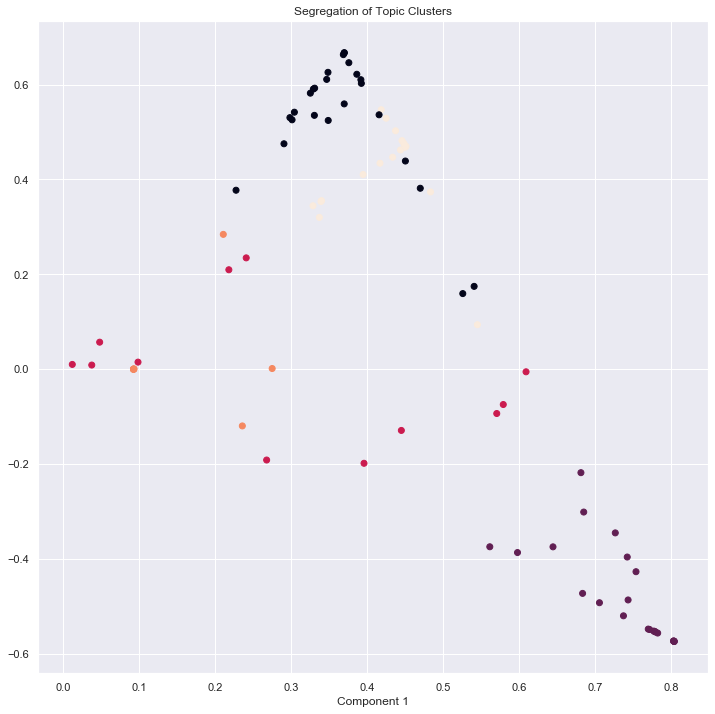

In [135]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )


In [136]:
# Define function to predict topic for a given text document.
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization
# Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))
# Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)
# Step 4: LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 1:14].values.tolist()
    
    # Step 5: Infer Topic
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    
    #topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topics]
    return infer_topic, topic, topic_probability_scores
# Predict the topic
mytext = ["Very Useful in diabetes age 30. I need control sugar. thanks Good deal"]
infer_topic, topic, prob_scores = predict_topic(text = mytext)
print(topic)
print(infer_topic)

['review', 'base', 'pattern', 'use', 'research', 'design', 'quality', 'method', 'effect', 'evidence', 'result', 'author', 'report']
health
